In [31]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
train=pd.read_csv(r"C:\Users\Anne Marie\Desktop\Tourism Hackathon\Train.csv")
test=pd.read_csv(r"C:\Users\Anne Marie\Desktop\Tourism Hackathon\Test.csv")
sub_df=pd.read_csv(r"C:\Users\Anne Marie\Desktop\Tourism Hackathon\SampleSubmission.csv")
descp=pd.read_csv(r"C:\Users\Anne Marie\Desktop\Tourism Hackathon\VariableDefinitions.csv")

In [3]:
print("Size of train",train.shape)
print("Size of test",test.shape)

Size of train (4809, 23)
Size of test (1601, 22)


In [4]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


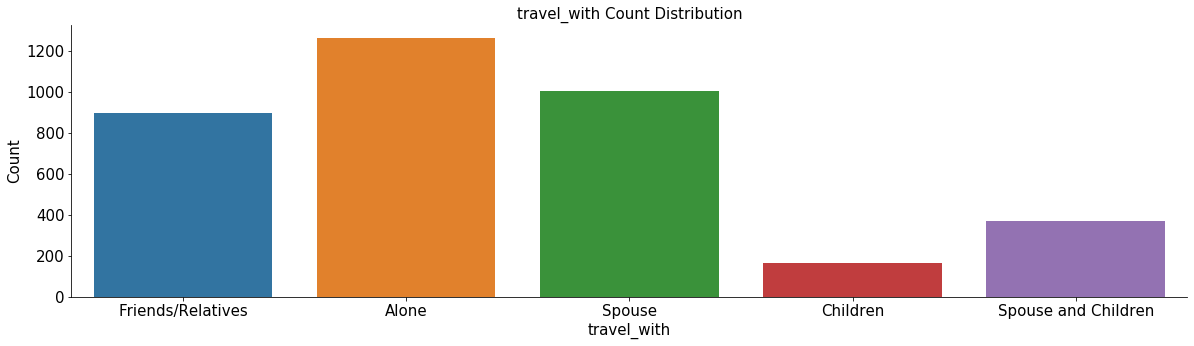

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'travel_with', data = train)
ax.set_xlabel('travel_with', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('travel_with Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

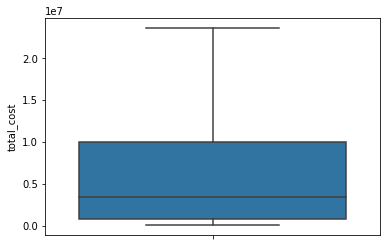

In [6]:
sns.boxplot(y='total_cost', data=train, showfliers=False)
plt.show()

In [7]:
for i in range(0, 100, 10):
    var =train["total_cost"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 49000.0
10 percentile value is 248625.0
20 percentile value is 530400.0
30 percentile value is 1065000.0
40 percentile value is 2000000.0
50 percentile value is 3397875.0
60 percentile value is 5304000.0
70 percentile value is 8121750.0
80 percentile value is 12254382.0
90 percentile value is 21810040.0
100 percentile value is  99532875.0


In [8]:
for i in range(90, 100, 1):
    var =train["total_cost"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 21810040.0
91 percentile value is 23453625.0
92 percentile value is 25111125.0
93 percentile value is 26934375.0
94 percentile value is 29873025.0
95 percentile value is 33481500.0
96 percentile value is 35636250.0
97 percentile value is 41437500.0
98 percentile value is 49890750.0
99 percentile value is 58344000.0
100 percentile value is  99532875.0


##### Only 1% of the tourists have a total cost of more than 58,344,000.00
##### Only 90% of the tourists have a total cost of less than 21,810,040.00

#### Correlation between features(columns) and target variable ‘y’

In [9]:
train.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

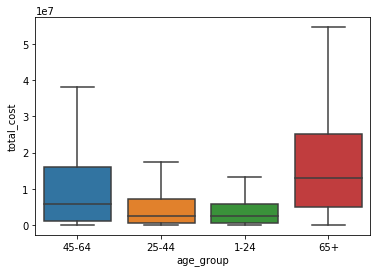

In [10]:
sns.boxplot(x='age_group', y='total_cost', data=train, showfliers=False)
plt.show()

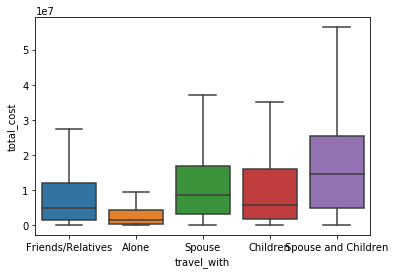

In [11]:
sns.boxplot(x='travel_with', y='total_cost', data=train, showfliers=False)
plt.show()

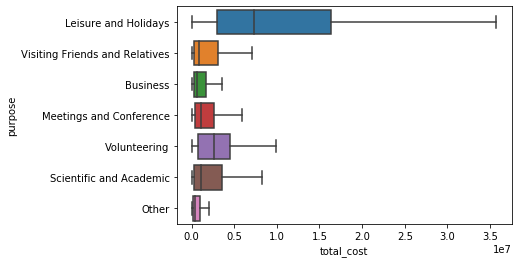

In [12]:
sns.boxplot(x='total_cost', y='purpose', data=train, showfliers=False)
plt.show()

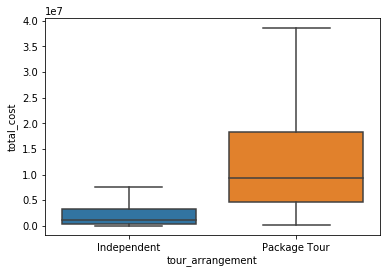

In [13]:
sns.boxplot(x='tour_arrangement', y='total_cost', data=train, showfliers=False)
plt.show()

In [14]:
data=pd.concat([train,test],sort=False).reset_index(drop=True)
data.columns.tolist()

['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost']

In [15]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1441
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           424
total_cost               1601
dtype: int64

In [16]:
data.travel_with.fillna('None',inplace=True)
data.most_impressing.fillna('None',inplace=True)
data.total_female.fillna(data.total_female.mean(),inplace = True)
data.total_male.fillna(data.total_male.mean(),inplace = True)

In [17]:
data.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with                 0
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing             0
total_cost               1601
dtype: int64

In [18]:
 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['age_group'] = le.fit_transform(data['age_group'])
data['package_transport_int'] = le.fit_transform(data['package_transport_int'])
data['package_accomodation'] = le.fit_transform(data['package_accomodation'])
data['package_food'] = le.fit_transform(data['package_food'])
data['package_transport_tz'] = le.fit_transform(data['package_transport_tz'])
data['package_sightseeing'] = le.fit_transform(data['package_sightseeing'])
data['package_guided_tour'] = le.fit_transform(data['package_guided_tour'])
data['package_insurance'] = le.fit_transform(data['package_insurance'])
data['first_trip_tz'] = le.fit_transform(data['first_trip_tz'])
data['country'] = le.fit_transform(data['country'])

In [19]:
columns_to_transform = ['tour_arrangement','travel_with','purpose','main_activity','info_source','most_impressing','payment_mode']
data = pd.get_dummies( data,columns = columns_to_transform,drop_first=True)

In [20]:
data.head(2)

,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost,tour_arrangement_Package Tour,travel_with_Children,travel_with_Friends/Relatives,travel_with_None,travel_with_Spouse,travel_with_Spouse and Children,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
0,tour_0,101,3,1.0,1.0,0,0,0,0,0,0,0,13.0,0.0,0,674602.5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,tour_10,111,2,1.0,0.0,0,0,0,0,0,0,0,14.0,7.0,1,3214906.5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [21]:
## convert float dtypes to int
data["total_female"] = data['total_female'].astype('int')
data["total_male"] = data['total_male'].astype('int')
data["night_mainland"] = data['night_mainland'].astype('int')
data["night_zanzibar"] = data['night_zanzibar'].astype('int')

In [22]:
#feature engineering
data["total_persons"] = data["total_female"] + data["total_male"]

data["total_nights_spent"] = data["night_mainland"] + data["night_zanzibar"]


In [23]:
## separate data into train and test
train=data[data.total_cost.notnull()].reset_index(drop=True)
test=data[data.total_cost.isna()].reset_index(drop=True)

In [24]:
print(train.shape)
print(test.shape)

(4809, 55)
(1601, 55)


In [25]:
#Modelling
feat_cols = train.drop(["ID","total_cost"],1)
cols = feat_cols.columns
target=train["total_cost"]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [27]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(train[cols],target, test_size=0.25, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3606, 53) (3606,)
(1203, 53) (1203,)


In [46]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error


In [54]:
SVRmodel = SVR(kernel = 'linear',C=1e3, gamma=0.1)
SVRmodel.fit(X_train, y_train)
y_pred = SVRmodel.predict(X_test)

In [55]:
predictions_SVR = SVRmodel.predict(X_test)
MAE = mean_absolute_error(y_test , predictions_SVR)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  5476603.547353112


In [59]:

SVRmodel = SVR(C=0.3, max_iter=200)
SVRmodel.fit(X_train, y_train)

svr_preds_tr = SVRmodel.predict(X_train)
print('Train RMSLE:', mean_absolute_error(y_test , predictions_SVR))



Train RMSLE: 5476603.547353112


In [40]:
# Get the mean absolute error on the validation data
predictions_SVR = SVRmodel.predict(X_test)
MAE = mean_absolute_error(y_test , predictions_SVR)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  6738069.609157107


In [38]:
#predict and prepare submission file
sub = test[cols]
predictions_XGB = XGBmodel.predict(sub)
submission_df = pd.DataFrame({'ID': test.ID, 'total_cost': predictions_XGB})
submission_df.to_csv('submitXGB.csv',index=False)

In [39]:
submission_df.head(2)

,ID,total_cost
0,tour_1,21079478.0
1,tour_100,21425198.0


In [ ]:
pandas.